In [1]:
from sympy import *
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

In [2]:
def input_data():
    try:
        Q = input("Введите производственную функцию  Q(x,y): ")
        A = int(input("Введите A: "))
        a1 = input("Введите a1: ")
        a2 = input("Введите a2: ")
        w1 = int(input("Введите стоимость единицы первого ресурса (w1): "))
        w2 = int(input("Введите стоимость единицы второго ресурса (w2): "))
        I = int(input("Введите бюджетное ограничение на ресурсы (I): "))
        a1 = float(Fraction(a1))
        a2 = float(Fraction(a2))
        
    except ValueError:
        print("Ошибка ввода!")
        return None
    except KeyboardInterrupt:
        print("Прервано пользователем")
        return None
    return (Q,A,a1,a2,w1,w2,I)

def check_data(varible):
    try:
        sympify(varible)
    except SympifyError:
        print("Неверный ввод")
        return False
    return True

In [3]:
my_functions = input_data()

if my_functions != None:
    result_of_check = check_data(my_functions[0])
    if result_of_check != False:
        print("Выражение введено верно, можете приступать к вычислениям!")
    else:
        print("Упс... Что-то пошло не так, видимо, ошибка в введенном вами выражении, попробуйте ввести его еще раз!")
else:
    print("Вы ошиблись, попробуйте ввести выражение и данные еще раз!")

Введите производственную функцию  Q(x,y): A * (x^a1) * (y^a2)
Введите A: 28
Введите a1: 1/2
Введите a2: 0.2
Введите стоимость единицы первого ресурса (w1): 2
Введите стоимость единицы второго ресурса (w2): 4
Введите бюджетное ограничение на ресурсы (I): 200
Выражение введено верно, можете приступать к вычислениям!


# Вариант 13
#### Q(x,y): A * (x^a1) * (y^a2)
#### A = 28
#### a1 = 1/2
#### a2 = 0.2
#### w1 = 2
#### w2 = 4
#### I = 200

In [4]:
Q,A,a1,a2,w1,w2,I = my_functions
print(Q)
print()
print(A)
print()
print(a1)
print()
print(a2)
print()
print(w1)
print()
print(w2)
print()
print(I)

A * (x^a1) * (y^a2)

28

0.5

0.2

2

4

200


#### Преобразуем строковое выражение в общее математическое выражение

In [5]:
U = 'A * x^a1 * y^a2 - w1*x - w2*y'
U_E_1 = sympify(U)
U_E_1 = U_E_1.subs([("A", A), ("a1", a1), ("a2", a2), ("w1", w1), ("w2", w2)])
U_E_1

28*x**0.5*y**0.2 - 2*x - 4*y

In [6]:
U_E = sympify(Q)
U_E = U_E.subs([("A", A), ("a1", a1), ("a2", a2)])
U_E

28*x**0.5*y**0.2

### Задаем ограничения

In [7]:
from scipy.optimize import Bounds
# x > 0, y > 0
bounds = Bounds([0.001, 0.001], [np.inf, np.inf])
#линейные ограничения
from scipy.optimize import LinearConstraint
# 0 <= w1X + w2Y <= I
linear_constraint = LinearConstraint([[w1, w2]], [0.01], [I])


In [8]:
result = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E_1)(x[0], x[1]), x0=(1,1), 
                        method='trust-constr',
                       bounds=bounds, constraints=linear_constraint)
result

 barrier_parameter: 2.560000000000001e-07
 barrier_tolerance: 2.560000000000001e-07
          cg_niter: 31
      cg_stop_cond: 1
            constr: [array([199.99999938]), array([71.42857155, 14.28571407])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.10172653198242188
               fun: -202.78603547430095
              grad: array([-0.81950222, -1.63900443])
               jac: [array([[2, 4]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-2.83382529e-09,  1.41691312e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 57
              nhev: 0
               nit: 27
             niter: 27
              njev: 19
        optimality: 2.833825286830032e-09
            status: 1
           success: True
         tr_radius: 80409168.85316949
                 v: [array([0.40975111]), array

In [9]:
x_max, y_max, extremum = result.x[0], result.x[1], -result.fun

In [10]:
print(extremum)
print(x_max, y_max)

202.78603547430095
71.42857155463528 14.28571406648989


#### Строим графики

In [11]:
def draw_matplot_lib():
    plt.figure()
    ax = plt.figure().add_subplot(projection='3d')
    x = np.linspace(0, x_max)
    y = np.linspace(0, y_max)
    X, Y = np.meshgrid(x, y)
    Z = lambdify(['x', 'y'], U_E_1)(X, Y)

    ax.view_init(20, -150)
    ax.plot_surface(Y, X, Z,rstride = 1, cstride = 1, alpha = 1, cmap = 'viridis')
    plt.xlabel("X")
    plt.ylabel("Y")
    ax.invert_xaxis()

<Figure size 432x288 with 0 Axes>

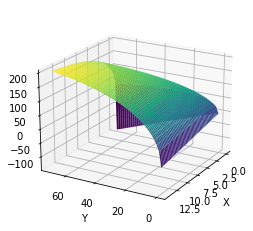

In [12]:
draw_matplot_lib()

In [13]:
result_2 = optimize.minimize(lambda x: -lambdify(["x", "y"], U_E_1)(x[0], x[1]), x0=(1,1), method="BFGS")
result_2

      fun: -269.27417865397535
 hess_inv: array([[331.23690316,  38.29381209],
       [ 38.29381209,  18.61424087]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([224.39458074,  44.8790355 ])

In [14]:
x_max_2, y_max_2 = result_2.x[0], result_2.x[1]
print(x_max_2, y_max_2)

224.39458073539123 44.8790355010417


In [15]:
def draw_contour():
    delta = 0.25
    x = np.arange(3, 8 * x_max, delta)
    y = np.arange(3, 8 * y_max, delta)
    X, Y = np.meshgrid(x, y)
    z = lambdify(["x", "y"], U_E_1)(X, Y)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, z, levels = (140,160, 170, 190, extremum), colors = ("darkblue", "#C71585",
                                                                           "orange",
                                                                               "black", "red"))
    ax.clabel(CS, inline=True, fontsize=10)
    x = np.linspace(2, (I/w1))
    y_treug = (I - w1 * x) / w2
    y_2 = 0
    fig2 = ax.fill_between(x, y_2, y_treug)
    fig2.set_facecolor('green')
    fig.set_figwidth(6)
    fig.set_figheight(6)
    plt.title("Карта изоквант")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(x_max, y_max, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="green")
    plt.text(x_max + 90,y_max + 5,f'M*{int(x_max), int(y_max)}',horizontalalignment='right', color="blue")
    plt.plot(x_max_2, y_max_2, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
    plt.text(x_max_2 + 10,y_max_2 + 2,f'{int(extremum)}',horizontalalignment='right', color="red", fontsize=12)
#     plt.legend()
    plt.show()

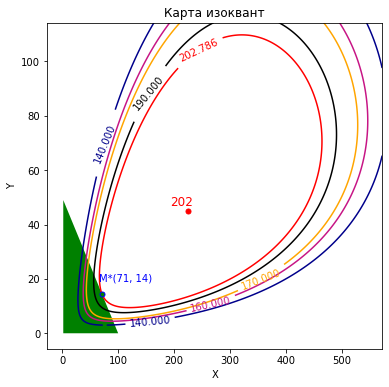

In [16]:
draw_contour()

In [17]:
print("ОТВЕТ")
print("Макс прибыль = ", extremum)
print(f"Оптимальный план{int(x_max), int(y_max)}")

ОТВЕТ
Макс прибыль =  202.78603547430095
Оптимальный план(71, 14)
